In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from PIL import Image
import timm
import torch
from tqdm import tqdm
import ast
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

/Users/veeranonthuvasin/Desktop/MSc-Data-Science-Bristol/Dissertation/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
real_world_data = pd.read_csv('../Data/Bristol-Corpus/Real-World-GrayScale-PSM3/real_world_df.csv')
real_world_data

,name,DayOfBirth,EducationalDegree,Gender,NativeCountry,NativeLanguage,OtherLanguage,Profession,WritingType,Science,WrittenLanguage,ascii_path,images_path,stroke_path
0,0,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
1,1,NaN,NaN,NaN,NaN,German,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
2,3,NaN,NaN,NaN,NaN,German,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
3,4,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
4,5,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
5,6,NaN,NaN,NaN,NaN,German,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN


In [3]:
real_world_data['NativeLanguage'].value_counts()

NativeLanguage
French    3
German    3
Name: count, dtype: int64

# Utility Functions
- Feature Extraction Functions
- Change writer label

In [ ]:
def feature_extraction(writer_name, images_path):
  model = timm.create_model(
      'convnextv2_nano.fcmae_ft_in22k_in1k',
      pretrained=True,
      num_classes=0,  # remove classifier nn.Linear
  )
  model = model.eval()

  data_config = timm.data.resolve_model_data_config(model)
  transforms = timm.data.create_transform(**data_config, is_training=False)

  all_features_data = []
  writer_id_list = []
  writer_forms_list = []
  for name, i in tqdm(zip(writer_name,images_path)):
      i = ast.literal_eval(i)
      for j in i:
        j = j.replace('./', '../')
        image_list = glob.glob(j)
        for k in image_list:
          with Image.open(k) as img:
            img = img.convert('RGB')
            
            with torch.no_grad():
              output = model(transforms(img).unsqueeze(0))
            # print(output)
            # features = output.pooler_output.detach().numpy()
            # print(features)
            # last_hidden_states = outputs.last_hidden_state
            # print(last_hidden_states.shape)
            # features = last_hidden_states[:, 0, :]
            # print(features)
            # Store the results
            image_form = os.path.splitext(os.path.basename(k))[0]
            writer_forms_list.append(image_form)
            writer_id_list.append(name)
            all_features_data.append(output.detach().flatten().tolist())

              


  writer_features_df = pd.DataFrame(data=all_features_data)
  writer_features_df['name'] = writer_id_list
  writer_features_df['form'] = writer_forms_list
  return writer_features_df

def convert_y(y):
  if y == 'German':
    return 0
  if y == 'French': 
    return 1
  if y == 'English':
    return 2

# Feature Extraction Full

In [5]:
all_features = feature_extraction(real_world_data['name'], real_world_data['images_path'])
all_features

6it [00:18,  3.08s/it]


,0,1,2,3,4,5,6,7,8,9,...,632,633,634,635,636,637,638,639,name,form
0,0.900881,-1.535855,1.216326,0.263924,0.861893,0.184795,-1.468211,-0.903002,0.471242,-1.091495,...,0.058538,-1.304109,1.541442,-0.424794,-0.802706,1.041371,-0.328758,3.136823,0,page000_line003
1,1.134265,-1.362282,2.273987,0.284600,-0.652768,-0.222237,-0.832183,-1.145109,0.296855,-2.368747,...,0.157107,-1.092878,1.892547,-0.487107,0.093969,2.060857,-1.213497,2.975895,0,page000_line002
2,0.593472,-0.976235,0.744769,0.308163,-0.685127,-0.755348,-2.012943,0.673236,-0.896982,-1.988740,...,-0.753516,-0.608883,1.339883,0.432048,0.636367,1.714106,0.504608,1.266553,0,page000_line000
3,1.280957,-1.285501,1.829224,0.499230,-0.052572,0.709289,-1.074080,-1.166486,0.981797,-1.591591,...,0.361287,-0.495855,1.635529,-0.772384,1.012281,2.350589,-0.735705,2.450419,0,page000_line001
4,1.312774,-0.413435,2.063291,0.887190,0.801703,-0.023718,-2.104139,0.721972,0.649561,-2.637098,...,-0.471062,0.093955,0.671852,0.130571,-0.747895,2.493425,-1.339399,1.875247,0,page000_line005
5,-0.088423,-0.558079,2.144183,0.348551,-0.823501,-0.331861,-1.095646,0.077632,0.161654,-2.837906,...,-0.645933,-0.706350,0.919395,1.023801,-0.501715,1.016948,-1.168648,1.912641,0,page000_line004
6,1.352457,-1.241885,1.946865,0.645203,-0.915543,-0.268871,-1.386410,-0.908995,0.262660,-2.861198,...,0.164378,0.277399,2.058115,0.161064,0.208770,3.003321,-1.318584,2.281312,0,page000_line006
7,1.507467,-1.915475,2.334567,0.967679,0.755115,0.768464,-1.766531,-0.953910,0.261470,-2.457000,...,0.438582,-0.710739,1.944403,-0.137118,-0.349195,2.496340,-0.891258,2.711566,0,page000_line007
8,1.369867,-1.144850,2.374497,1.486444,0.057034,0.659323,-0.906150,-0.305979,-0.087208,-2.945641,...,0.621893,-1.044549,1.939120,0.076557,0.389761,1.469566,-0.691275,1.780019,0,page000_line008
9,-0.611749,-2.095418,0.496747,1.899151,-0.842998,0.447551,-1.261050,-2.167131,1.413064,-2.242526,...,0.244677,-0.928682,1.154003,-0.196702,-1.030584,1.451702,-0.573324,0.096913,1,page000_line003


# Feature Extraction for Training Set (class-wise fixed images_per_subwrite sizes and bootstrapping, but dynamic sub_profile_per_writer)
- 4 Sentence-Level Images per Sub-writer Profile for English, creating 3 Sub-writer Profiles.
- 4 Sentence-Level Images per Sub-writer Profile for German/French, creating 12 Sub-writer Profiles.

In [6]:
def create_sub_writers_bootstrap(train_df, feature_store, images_per_subwriter=4, fold_seed=42):
  
    writer_names_in_fold = train_df['name'].unique()
    feature_df = feature_store[feature_store['name'].isin(writer_names_in_fold)]

    feature_columns = [col for col in feature_df.columns if col not in ['name', 'form']]
    aggregated_data = []
    
    unique_writers = feature_df['name'].unique()
    
    for writer_id in unique_writers:
        writer_df = feature_df[feature_df['name'] == writer_id]
        num_images = len(writer_df)
        
        if num_images == 0:
            continue


        try:
            language = train_df.loc[train_df['name'] == writer_id, 'NativeLanguage'].iloc[0]
        except IndexError:
            print(f"Warning: Could not find language for writer_id {writer_id}. Skipping.")
            continue


        if language == 'English':
            current_num_profiles_per_writer = 3  # Create fewer profiles for the low-data class
        else:  # For German and French
            current_num_profiles_per_writer = 12 # Create more profiles for the high-data classes


        if num_images <= images_per_subwriter:
            feature_chunk = writer_df[feature_columns]
            mean_features = feature_chunk.mean(axis=0)
            median_features = feature_chunk.median(axis=0)
            std_features = feature_chunk.std(axis=0).fillna(0)
            skew_features = feature_chunk.skew(axis=0).fillna(0)
            
            new_row = {}
            for col in feature_columns:
                new_row[f'{col}|mean'] = mean_features[col]
                new_row[f'{col}|median'] = median_features[col]
                new_row[f'{col}|std'] = std_features[col]
                new_row[f'{col}|skew'] = skew_features[col]
                
            new_row['original_writer_id'] = writer_id
            new_row['sub_writer_id'] = f"{writer_id}-agg-0"
            aggregated_data.append(new_row)
            continue

        writer_profiles = []
        max_attempts = current_num_profiles_per_writer * 5
        
        for i in range(max_attempts):
            sample_chunk = writer_df.sample(
                n=images_per_subwriter, 
                replace=True, 
                random_state=fold_seed + hash(writer_id) % 100000 + i
            )
            feature_chunk = sample_chunk[feature_columns]
            
            mean_features = feature_chunk.mean(axis=0)
            median_features = feature_chunk.median(axis=0)
            std_features = feature_chunk.std(axis=0).fillna(0)
            skew_features = feature_chunk.skew(axis=0).fillna(0)
            
            profile_dict = {}
            for col in feature_columns:
                profile_dict[f'{col}|mean'] = mean_features[col]
                profile_dict[f'{col}|median'] = median_features[col]
                profile_dict[f'{col}|std'] = std_features[col]
                profile_dict[f'{col}|skew'] = skew_features[col]
                
            writer_profiles.append(profile_dict)
            
            temp_df = pd.DataFrame(writer_profiles).drop_duplicates()
            if len(temp_df) >= current_num_profiles_per_writer:
                break
        
        if writer_profiles:
            profiles_df = pd.DataFrame(writer_profiles)
            unique_profiles_df = profiles_df.drop_duplicates().reset_index(drop=True)
            final_profiles_df = unique_profiles_df.head(current_num_profiles_per_writer)

            for i, row in final_profiles_df.iterrows():
                profile_data = row.to_dict()
                profile_data['original_writer_id'] = writer_id
                profile_data['sub_writer_id'] = f"{writer_id}-boot-{i}"
                aggregated_data.append(profile_data)
            
    final_df = pd.DataFrame(aggregated_data)
    
    if final_df.empty:
        return pd.DataFrame(), pd.Series(dtype='int')

    new_feature_columns = []
    for col in feature_columns:
        new_feature_columns.append(f'{col}|mean')
        new_feature_columns.append(f'{col}|median')
        new_feature_columns.append(f'{col}|std')
        new_feature_columns.append(f'{col}|skew')

    cols = ['sub_writer_id', 'original_writer_id'] + new_feature_columns
    final_df = final_df[cols]
    display(final_df)
    
    final_df = pd.merge(final_df, train_df[['name', 'NativeLanguage']], how='inner', left_on='original_writer_id', right_on='name')
    X_train = final_df.drop(columns=['sub_writer_id', 'original_writer_id','name','NativeLanguage'])
    y_train = final_df['NativeLanguage']
    y_train = np.vectorize(convert_y)(y_train)
    
    return X_train, y_train

In [7]:
feature_store = pd.read_csv('./Final-Data/All-Writers-Feature-Vectors-GrayScale.csv', index_col=[0])
display(feature_store)
writers_info = pd.read_csv('./Final-Data/new-writers-info.csv')
english_writer_info = pd.read_csv('../Data/Bristol-Corpus/English-GrayScale/english_df.csv')
writers_info = pd.concat([writers_info, english_writer_info], axis=0, ignore_index=True)
writers_info = writers_info.loc[(writers_info['NativeLanguage'] != 'Swiss German')]
all_writers_info = feature_store[['name']].drop_duplicates().reset_index(drop=True)
all_writers_info = pd.merge(all_writers_info, writers_info[['name', 'NativeLanguage']], how='inner', on='name')
all_labels = all_writers_info['NativeLanguage']

,0,1,2,3,4,5,6,7,8,9,...,632,633,634,635,636,637,638,639,name,form
0,-0.372276,0.224989,-0.467460,1.820759,-0.586967,1.776678,-3.153311,-2.495186,0.968704,-1.006844,...,-0.981443,-0.273160,1.014988,1.218125,-0.981978,3.083691,-1.024849,2.180169,10000,z01-000-03
1,-0.033635,-0.905358,0.258783,1.923517,-0.866238,0.205671,-1.162825,-0.941368,1.491512,-0.259629,...,-0.438199,-1.047727,1.526454,-0.711613,-0.884340,0.576500,-1.261368,1.769279,10000,z01-000-02
2,0.025888,-0.592650,0.585571,2.040271,-0.155405,-0.120354,-1.829877,-1.252309,1.205214,-0.259600,...,-1.126850,-1.122187,0.977126,0.345049,-0.814934,0.962746,-0.548778,2.673030,10000,z01-000-01
3,-1.510987,-0.666809,-1.368710,1.987004,-0.221620,0.672618,-3.057467,-1.380301,1.458408,-1.007992,...,-1.292161,-1.257141,-0.041370,1.655186,-0.791135,2.099786,-1.133589,1.716038,10000,z01-000-05
4,-0.917990,-0.359039,0.085779,1.985653,-1.203340,0.940839,-2.236159,-2.180054,1.759380,-1.052856,...,-0.828048,-1.400792,1.134104,0.957654,-0.926594,2.193790,-1.190055,2.018496,10000,z01-000-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,-0.166905,-1.087335,0.436946,0.041008,-1.445201,0.030634,-0.942336,-1.672251,2.018108,0.040737,...,-1.728344,-0.209595,1.440409,0.387701,0.704579,0.775189,-1.445656,1.703038,25,page000_line001
2837,-1.020958,-0.973095,-0.202618,0.460286,-0.908080,0.431273,-1.310988,-2.186874,1.921045,-1.022282,...,-1.463473,-0.259575,0.989406,0.643102,0.046823,0.620898,-0.797454,2.097991,25,page000_line005
2838,0.187808,-0.616186,0.712529,1.516693,-1.776467,1.043272,-0.366190,-1.701217,1.274346,-1.977084,...,-0.142874,1.226076,0.536600,0.963856,0.226091,1.882359,-2.185912,1.138407,25,page000_line006
2839,-0.546677,-1.329427,-0.422880,1.233715,-1.006450,0.287910,-1.033419,-2.418210,1.775813,-1.206054,...,-1.083004,-0.112003,0.532118,0.783740,0.341568,0.286427,-0.865030,1.536021,25,page000_line009


## X_test

In [8]:
def create_writer_level_profile(test_df, feature_store):

  writer_names_in_fold = test_df['name'].unique()
  print(writer_names_in_fold)
  test_features_df = feature_store[feature_store['name'].isin(writer_names_in_fold)]
  
  writer_level_feature_df = test_features_df.groupby(['name'], as_index=False)[test_features_df.columns[:-2]].agg(['mean', 'median', 'std', 'skew']).fillna(0)
  writer_level_feature_df.columns = writer_level_feature_df.columns.map(lambda x: '|'.join(map(str, x)))
  
  final_test_df = pd.merge(writer_level_feature_df, test_df[['name', 'NativeLanguage']], how='inner', left_on='name|', right_on='name')
  
  X_test = final_test_df.drop(columns=['name','name|','NativeLanguage'])
  y_test = final_test_df['NativeLanguage']
  y_test = np.vectorize(convert_y)(y_test)
  
  return X_test, y_test
  
  


# Model

In [9]:
import pandas as pd
import numpy as np
import joblib
import optuna
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# --- Configuration ---
N_TRIALS = 100  
VALIDATION_SET_SIZE = 0.2 # Use 20% of the data for validation in each trial.

# ==============================================================================

def final_objective(trial, X_train_full, y_train_full):
    params = {
        'feature_selection__max_features': trial.suggest_int('feature_selection__max_features', 10, 1000),
        'classification__n_estimators': trial.suggest_int('classification__n_estimators', 50, 1000),
        'classification__learning_rate': trial.suggest_float('classification__learning_rate', 1e-3, 0.01, log=True),
        'classification__max_depth': trial.suggest_int('classification__max_depth', 3, 15),
        'classification__subsample': trial.suggest_float('classification__subsample', 0.6, 1.0),
        'classification__colsample_bytree': trial.suggest_float('classification__colsample_bytree', 0.6, 1.0),
        'classification__lambda': trial.suggest_float('classification__lambda', 0.1, 30.0, log=True),
        'classification__alpha': trial.suggest_float('classification__alpha', 0.1, 20.0, log=True),
        'classification__min_child_weight': trial.suggest_int('classification__min_child_weight', 1, 10)
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
        ('classification', XGBClassifier(random_state=42, eval_metric='mlogloss'))
    ])
    pipeline.set_params(**params)


    sss = StratifiedShuffleSplit(n_splits=1, test_size=VALIDATION_SET_SIZE, random_state=42)
    train_idx, val_idx = next(sss.split(X_train_full, y_train_full))

    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_val)
    score = f1_score(y_val, predictions, average='macro')

    return score

if __name__ == '__main__':
    X_train_full, y_train_full = create_sub_writers_bootstrap(
        train_df=all_writers_info,
        feature_store=feature_store,
        images_per_subwriter=4,
        fold_seed=42 
    )
    print(f"Augmented training set created with {len(X_train_full)} samples.")

    print(f"\nStarting Optuna hyperparameter search for {N_TRIALS} trials...")
    study = optuna.create_study(direction='maximize')
    
    objective_with_data = lambda trial: final_objective(trial, X_train_full, y_train_full)
    
    study.optimize(objective_with_data, n_trials=N_TRIALS, show_progress_bar=True)

    final_best_params = study.best_params
    print("\n--- Optuna Search Complete ---")
    print(f"Best validation F1-score: {study.best_value}")
    print("\n--- Final Best Hyperparameters for Production Model ---")
    print(final_best_params)
    

,sub_writer_id,original_writer_id,0|mean,0|median,0|std,0|skew,1|mean,1|median,1|std,1|skew,...,637|std,637|skew,638|mean,638|median,638|std,638|skew,639|mean,639|median,639|std,639|skew
0,10000-boot-0,10000,-1.267652,-1.268100,0.415971,0.003528,-0.720088,-0.715909,0.304577,-0.079466,...,0.571644,0.665995,-0.984765,-1.105879,0.482978,1.371838,2.088727,1.771725,0.717917,1.939357
1,10000-boot-1,10000,-0.096789,-0.033635,0.126309,-2.000000,-1.000710,-0.905358,0.190704,-2.000000,...,0.045445,2.000000,-1.136550,-1.261368,0.249637,2.000000,1.853013,1.769279,0.167468,2.000000
2,10000-boot-2,10000,-1.080543,-1.316513,0.827803,0.996498,-0.784924,-0.843327,0.369418,0.334582,...,0.709097,1.841362,-1.149286,-1.309606,0.415903,1.599816,2.752915,2.916548,0.540770,-1.103018
3,10000-boot-3,10000,-1.363532,-1.356938,0.281721,-0.140316,-0.020133,0.062116,1.058608,-0.082969,...,0.724032,-0.523828,-1.178393,-1.103123,0.167589,-1.970004,1.825675,1.492511,0.943967,1.410531
4,10000-boot-4,10000,-0.650433,-0.645133,0.375076,-0.024936,-0.546456,-0.562023,0.639290,0.126352,...,1.055851,0.284084,-1.013792,-1.051509,0.181371,1.139840,2.032573,2.061356,0.151884,-0.961866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,22-boot-1,22,0.644612,0.619500,0.758466,0.015167,-1.920069,-2.102232,0.475410,1.586929,...,0.410881,-1.675974,-0.887732,-0.987716,0.505605,0.512837,-0.423427,-0.777453,0.844441,1.775209
482,22-boot-2,22,0.257158,-0.055582,0.734057,1.918920,-0.621170,-0.918728,0.997249,1.338300,...,0.883145,-1.152537,-0.625930,-0.338597,0.930939,-1.604537,-0.643648,-0.737771,1.140437,0.458236
483,25-boot-0,25,-1.114425,-1.416616,0.944905,1.208600,-0.690269,-0.601042,0.189090,-1.966474,...,0.627697,1.999716,-1.327645,-1.163606,0.597646,-1.481425,0.752092,0.512196,1.074083,0.643611
484,25-boot-1,25,-0.783817,-0.783817,0.273827,0.000000,-1.151261,-1.151261,0.205728,0.000000,...,0.193107,0.000000,-0.831242,-0.831242,0.039015,0.000000,1.817006,1.817006,0.324453,0.000000


[I 2025-08-30 02:20:24,565] A new study created in memory with name: no-name-af885b1b-c206-4252-b56f-1472299ce1f6


Augmented training set created with 486 samples.

Starting Optuna hyperparameter search for 100 trials...


Best trial: 0. Best value: 0.835838:   1%|          | 1/100 [00:11<19:45, 11.97s/it]

[I 2025-08-30 02:20:36,534] Trial 0 finished with value: 0.8358382537126499 and parameters: {'feature_selection__max_features': 641, 'classification__n_estimators': 333, 'classification__learning_rate': 0.002946670582665134, 'classification__max_depth': 4, 'classification__subsample': 0.8486504178871404, 'classification__colsample_bytree': 0.9760663579788829, 'classification__lambda': 21.121453126520688, 'classification__alpha': 10.357116633455888, 'classification__min_child_weight': 2}. Best is trial 0 with value: 0.8358382537126499.


Best trial: 1. Best value: 0.862875:   2%|▏         | 2/100 [00:24<19:51, 12.16s/it]

[I 2025-08-30 02:20:48,829] Trial 1 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 330, 'classification__n_estimators': 848, 'classification__learning_rate': 0.009054555995909505, 'classification__max_depth': 6, 'classification__subsample': 0.7124167389427697, 'classification__colsample_bytree': 0.7822094262551019, 'classification__lambda': 13.13947097840283, 'classification__alpha': 0.21984108905456892, 'classification__min_child_weight': 6}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:   3%|▎         | 3/100 [00:33<17:37, 10.90s/it]

[I 2025-08-30 02:20:58,225] Trial 2 finished with value: 0.8358382537126499 and parameters: {'feature_selection__max_features': 200, 'classification__n_estimators': 807, 'classification__learning_rate': 0.007847712717851183, 'classification__max_depth': 8, 'classification__subsample': 0.6152140049526106, 'classification__colsample_bytree': 0.6667460335074715, 'classification__lambda': 0.21434425521526845, 'classification__alpha': 14.738403063928812, 'classification__min_child_weight': 4}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:   4%|▍         | 4/100 [00:50<20:55, 13.08s/it]

[I 2025-08-30 02:21:14,638] Trial 3 finished with value: 0.843862041104883 and parameters: {'feature_selection__max_features': 305, 'classification__n_estimators': 592, 'classification__learning_rate': 0.0017241717026134607, 'classification__max_depth': 6, 'classification__subsample': 0.7905564444804322, 'classification__colsample_bytree': 0.835139086721246, 'classification__lambda': 1.215289811891079, 'classification__alpha': 0.6998757871902586, 'classification__min_child_weight': 2}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:   5%|▌         | 5/100 [01:06<22:22, 14.13s/it]

[I 2025-08-30 02:21:30,653] Trial 4 finished with value: 0.851992122405696 and parameters: {'feature_selection__max_features': 236, 'classification__n_estimators': 635, 'classification__learning_rate': 0.006347451922783713, 'classification__max_depth': 11, 'classification__subsample': 0.9806562669278565, 'classification__colsample_bytree': 0.6959200298289209, 'classification__lambda': 0.10988824074872876, 'classification__alpha': 0.8201655835201137, 'classification__min_child_weight': 1}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:   6%|▌         | 6/100 [01:17<20:51, 13.31s/it]

[I 2025-08-30 02:21:42,358] Trial 5 finished with value: 0.8351463912536056 and parameters: {'feature_selection__max_features': 853, 'classification__n_estimators': 374, 'classification__learning_rate': 0.004484116159615471, 'classification__max_depth': 14, 'classification__subsample': 0.7380173779371622, 'classification__colsample_bytree': 0.8496583150398244, 'classification__lambda': 0.3842431091429304, 'classification__alpha': 0.8015089368931341, 'classification__min_child_weight': 7}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:   7%|▋         | 7/100 [01:20<15:23,  9.93s/it]

[I 2025-08-30 02:21:45,329] Trial 6 finished with value: 0.8351463912536056 and parameters: {'feature_selection__max_features': 597, 'classification__n_estimators': 121, 'classification__learning_rate': 0.004897235253806007, 'classification__max_depth': 3, 'classification__subsample': 0.6431602711032735, 'classification__colsample_bytree': 0.6415326750714742, 'classification__lambda': 0.5399510666107141, 'classification__alpha': 0.8593883266085615, 'classification__min_child_weight': 9}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:   8%|▊         | 8/100 [01:38<19:05, 12.45s/it]

[I 2025-08-30 02:22:03,167] Trial 7 finished with value: 0.8473183195405417 and parameters: {'feature_selection__max_features': 792, 'classification__n_estimators': 525, 'classification__learning_rate': 0.0033907063167969613, 'classification__max_depth': 7, 'classification__subsample': 0.6578348364804464, 'classification__colsample_bytree': 0.6572641617475958, 'classification__lambda': 7.718635747918464, 'classification__alpha': 0.12167736636935834, 'classification__min_child_weight': 3}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:   9%|▉         | 9/100 [01:46<16:37, 10.97s/it]

[I 2025-08-30 02:22:10,874] Trial 8 finished with value: 0.8335151845790144 and parameters: {'feature_selection__max_features': 602, 'classification__n_estimators': 315, 'classification__learning_rate': 0.0051386287368829185, 'classification__max_depth': 9, 'classification__subsample': 0.8276831492697142, 'classification__colsample_bytree': 0.6445304906579671, 'classification__lambda': 0.6600401005500346, 'classification__alpha': 0.3110043066562891, 'classification__min_child_weight': 10}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:  10%|█         | 10/100 [01:47<12:07,  8.09s/it]

[I 2025-08-30 02:22:12,513] Trial 9 finished with value: 0.8284059524780627 and parameters: {'feature_selection__max_features': 77, 'classification__n_estimators': 62, 'classification__learning_rate': 0.002315256341522965, 'classification__max_depth': 6, 'classification__subsample': 0.8636069581846166, 'classification__colsample_bytree': 0.7551468283122076, 'classification__lambda': 0.1537168363726508, 'classification__alpha': 0.44582825879843174, 'classification__min_child_weight': 6}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:  11%|█         | 11/100 [02:06<16:37, 11.21s/it]

[I 2025-08-30 02:22:30,808] Trial 10 finished with value: 0.8358382537126499 and parameters: {'feature_selection__max_features': 405, 'classification__n_estimators': 994, 'classification__learning_rate': 0.0010413979652598502, 'classification__max_depth': 11, 'classification__subsample': 0.7384446324425695, 'classification__colsample_bytree': 0.918939145787927, 'classification__lambda': 4.563835656175795, 'classification__alpha': 3.960929579825326, 'classification__min_child_weight': 8}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:  12%|█▏        | 12/100 [02:10<13:13,  9.02s/it]

[I 2025-08-30 02:22:34,825] Trial 11 finished with value: 0.7977220654418279 and parameters: {'feature_selection__max_features': 31, 'classification__n_estimators': 768, 'classification__learning_rate': 0.00991351542029569, 'classification__max_depth': 12, 'classification__subsample': 0.9990848238685484, 'classification__colsample_bytree': 0.7321112696347131, 'classification__lambda': 3.242887778483523, 'classification__alpha': 0.1590653729351457, 'classification__min_child_weight': 5}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:  13%|█▎        | 13/100 [02:30<18:07, 12.50s/it]

[I 2025-08-30 02:22:55,330] Trial 12 finished with value: 0.8440687063875468 and parameters: {'feature_selection__max_features': 254, 'classification__n_estimators': 775, 'classification__learning_rate': 0.007184539491830894, 'classification__max_depth': 11, 'classification__subsample': 0.9652764726334495, 'classification__colsample_bytree': 0.7417872912863951, 'classification__lambda': 19.825638959273846, 'classification__alpha': 2.3001528792302466, 'classification__min_child_weight': 1}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:  14%|█▍        | 14/100 [02:49<20:37, 14.39s/it]

[I 2025-08-30 02:23:14,075] Trial 13 finished with value: 0.8613736263736264 and parameters: {'feature_selection__max_features': 403, 'classification__n_estimators': 997, 'classification__learning_rate': 0.006931172582940143, 'classification__max_depth': 15, 'classification__subsample': 0.9152029489271344, 'classification__colsample_bytree': 0.7773773526888486, 'classification__lambda': 1.9410243276333567, 'classification__alpha': 0.23280473220770884, 'classification__min_child_weight': 5}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 1. Best value: 0.862875:  15%|█▌        | 15/100 [03:05<21:09, 14.93s/it]

[I 2025-08-30 02:23:30,274] Trial 14 finished with value: 0.8613736263736264 and parameters: {'feature_selection__max_features': 447, 'classification__n_estimators': 994, 'classification__learning_rate': 0.00972930384971974, 'classification__max_depth': 14, 'classification__subsample': 0.9274954751187283, 'classification__colsample_bytree': 0.8161533808866067, 'classification__lambda': 8.344741100108953, 'classification__alpha': 0.2386525659407139, 'classification__min_child_weight': 6}. Best is trial 1 with value: 0.8628747795414462.


Best trial: 15. Best value: 0.870411:  16%|█▌        | 16/100 [03:21<21:24, 15.29s/it]

[I 2025-08-30 02:23:46,398] Trial 15 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 368, 'classification__n_estimators': 880, 'classification__learning_rate': 0.006114714583116497, 'classification__max_depth': 15, 'classification__subsample': 0.901700668393699, 'classification__colsample_bytree': 0.7847195847246358, 'classification__lambda': 1.4045286841754425, 'classification__alpha': 0.1201110470614429, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  17%|█▋        | 17/100 [03:40<22:39, 16.38s/it]

[I 2025-08-30 02:24:05,318] Trial 16 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 523, 'classification__n_estimators': 872, 'classification__learning_rate': 0.004066062599644616, 'classification__max_depth': 5, 'classification__subsample': 0.7256131784696446, 'classification__colsample_bytree': 0.8656924452295917, 'classification__lambda': 1.3015585934355338, 'classification__alpha': 0.10087529968728232, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  18%|█▊        | 18/100 [04:06<26:13, 19.18s/it]

[I 2025-08-30 02:24:31,019] Trial 17 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 988, 'classification__n_estimators': 658, 'classification__learning_rate': 0.005770440333726704, 'classification__max_depth': 9, 'classification__subsample': 0.7820011268263173, 'classification__colsample_bytree': 0.8794812640683918, 'classification__lambda': 13.168585927922619, 'classification__alpha': 1.84467720907127, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  19%|█▉        | 19/100 [04:13<20:54, 15.48s/it]

[I 2025-08-30 02:24:37,885] Trial 18 finished with value: 0.8513150831991411 and parameters: {'feature_selection__max_features': 140, 'classification__n_estimators': 869, 'classification__learning_rate': 0.008400444652221286, 'classification__max_depth': 13, 'classification__subsample': 0.6882214062103271, 'classification__colsample_bytree': 0.7921360211094995, 'classification__lambda': 3.019483787106197, 'classification__alpha': 0.17176662922056907, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  20%|██        | 20/100 [04:28<20:41, 15.52s/it]

[I 2025-08-30 02:24:53,480] Trial 19 finished with value: 0.8467288235560999 and parameters: {'feature_selection__max_features': 356, 'classification__n_estimators': 700, 'classification__learning_rate': 0.0026486367118762227, 'classification__max_depth': 8, 'classification__subsample': 0.892629715884182, 'classification__colsample_bytree': 0.605753412217504, 'classification__lambda': 6.014428167553055, 'classification__alpha': 0.38091313699625307, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  21%|██        | 21/100 [04:38<18:12, 13.83s/it]

[I 2025-08-30 02:25:03,387] Trial 20 finished with value: 0.8196153741066445 and parameters: {'feature_selection__max_features': 536, 'classification__n_estimators': 474, 'classification__learning_rate': 0.003494297047166271, 'classification__max_depth': 3, 'classification__subsample': 0.6974036702614337, 'classification__colsample_bytree': 0.9151540897033119, 'classification__lambda': 29.289969779610097, 'classification__alpha': 5.2568996279083136, 'classification__min_child_weight': 8}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  22%|██▏       | 22/100 [04:58<20:15, 15.58s/it]

[I 2025-08-30 02:25:23,051] Trial 21 finished with value: 0.8548309178743961 and parameters: {'feature_selection__max_features': 494, 'classification__n_estimators': 877, 'classification__learning_rate': 0.003809228650528347, 'classification__max_depth': 5, 'classification__subsample': 0.7630228678177954, 'classification__colsample_bytree': 0.8558959794613593, 'classification__lambda': 1.2963102425956106, 'classification__alpha': 0.10591881270775814, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  23%|██▎       | 23/100 [05:26<24:51, 19.36s/it]

[I 2025-08-30 02:25:51,234] Trial 22 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 743, 'classification__n_estimators': 881, 'classification__learning_rate': 0.00402153168900449, 'classification__max_depth': 5, 'classification__subsample': 0.7208749691720542, 'classification__colsample_bytree': 0.8915099194628952, 'classification__lambda': 0.7155589340996313, 'classification__alpha': 0.106260334631811, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  24%|██▍       | 24/100 [05:56<28:24, 22.43s/it]

[I 2025-08-30 02:26:20,809] Trial 23 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 719, 'classification__n_estimators': 908, 'classification__learning_rate': 0.005689256717007075, 'classification__max_depth': 5, 'classification__subsample': 0.7089360045686284, 'classification__colsample_bytree': 0.9881586012532749, 'classification__lambda': 0.7961165291336861, 'classification__alpha': 0.1783418952276388, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  25%|██▌       | 25/100 [06:22<29:29, 23.60s/it]

[I 2025-08-30 02:26:47,140] Trial 24 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 726, 'classification__n_estimators': 920, 'classification__learning_rate': 0.005643195209356361, 'classification__max_depth': 4, 'classification__subsample': 0.6682430808699463, 'classification__colsample_bytree': 0.9946184914492162, 'classification__lambda': 0.7197244118726221, 'classification__alpha': 0.478832660961114, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  26%|██▌       | 26/100 [07:01<34:36, 28.06s/it]

[I 2025-08-30 02:27:25,616] Trial 25 finished with value: 0.8542007637752319 and parameters: {'feature_selection__max_features': 902, 'classification__n_estimators': 726, 'classification__learning_rate': 0.0021984306619116573, 'classification__max_depth': 9, 'classification__subsample': 0.8222309563036687, 'classification__colsample_bytree': 0.949386846373925, 'classification__lambda': 0.38395189297417526, 'classification__alpha': 0.15660630933792413, 'classification__min_child_weight': 3}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  27%|██▋       | 27/100 [07:28<34:01, 27.96s/it]

[I 2025-08-30 02:27:53,340] Trial 26 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 680, 'classification__n_estimators': 935, 'classification__learning_rate': 0.004617259606986103, 'classification__max_depth': 7, 'classification__subsample': 0.7668205435082377, 'classification__colsample_bytree': 0.9127003102294938, 'classification__lambda': 2.2283375118903463, 'classification__alpha': 0.2764917537279375, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  28%|██▊       | 28/100 [07:49<31:01, 25.85s/it]

[I 2025-08-30 02:28:14,260] Trial 27 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 763, 'classification__n_estimators': 814, 'classification__learning_rate': 0.006032128762890667, 'classification__max_depth': 4, 'classification__subsample': 0.6162379893166547, 'classification__colsample_bytree': 0.9414310979860273, 'classification__lambda': 0.8812506266325266, 'classification__alpha': 0.15383294416679208, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  29%|██▉       | 29/100 [08:24<33:41, 28.47s/it]

[I 2025-08-30 02:28:48,841] Trial 28 finished with value: 0.842531635666647 and parameters: {'feature_selection__max_features': 850, 'classification__n_estimators': 936, 'classification__learning_rate': 0.0017249090694040324, 'classification__max_depth': 10, 'classification__subsample': 0.8059203411616132, 'classification__colsample_bytree': 0.8846984774192332, 'classification__lambda': 0.4504494568763528, 'classification__alpha': 0.5399427386508211, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  30%|███       | 30/100 [08:56<34:32, 29.61s/it]

[I 2025-08-30 02:29:21,124] Trial 29 finished with value: 0.8196153741066445 and parameters: {'feature_selection__max_features': 708, 'classification__n_estimators': 737, 'classification__learning_rate': 0.0030845505368782473, 'classification__max_depth': 5, 'classification__subsample': 0.8670146534788064, 'classification__colsample_bytree': 0.9624317023164949, 'classification__lambda': 0.29594639892196345, 'classification__alpha': 1.2480303739968106, 'classification__min_child_weight': 3}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  31%|███       | 31/100 [09:15<30:13, 26.29s/it]

[I 2025-08-30 02:29:39,659] Trial 30 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 648, 'classification__n_estimators': 431, 'classification__learning_rate': 0.00426465560768873, 'classification__max_depth': 7, 'classification__subsample': 0.6814092078166579, 'classification__colsample_bytree': 0.9923461240158968, 'classification__lambda': 0.9985374134266645, 'classification__alpha': 0.10326789907448046, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  32%|███▏      | 32/100 [09:32<26:53, 23.73s/it]

[I 2025-08-30 02:29:57,424] Trial 31 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 726, 'classification__n_estimators': 925, 'classification__learning_rate': 0.005598409855907004, 'classification__max_depth': 3, 'classification__subsample': 0.6673008770276417, 'classification__colsample_bytree': 0.9828961926252454, 'classification__lambda': 0.7088772495354843, 'classification__alpha': 0.3913377515117485, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  33%|███▎      | 33/100 [09:57<26:55, 24.11s/it]

[I 2025-08-30 02:30:22,421] Trial 32 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 795, 'classification__n_estimators': 915, 'classification__learning_rate': 0.005257951437434617, 'classification__max_depth': 4, 'classification__subsample': 0.7107274691777512, 'classification__colsample_bytree': 0.9968248842104539, 'classification__lambda': 1.6169908586957666, 'classification__alpha': 0.19660098591150105, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  34%|███▍      | 34/100 [10:20<26:02, 23.67s/it]

[I 2025-08-30 02:30:45,076] Trial 33 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 935, 'classification__n_estimators': 822, 'classification__learning_rate': 0.007429189643005597, 'classification__max_depth': 4, 'classification__subsample': 0.636412961581606, 'classification__colsample_bytree': 0.9659877826844887, 'classification__lambda': 0.24821890226394763, 'classification__alpha': 0.30114168852311035, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  35%|███▌      | 35/100 [10:42<25:10, 23.24s/it]

[I 2025-08-30 02:31:07,318] Trial 34 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 578, 'classification__n_estimators': 836, 'classification__learning_rate': 0.006507247641039209, 'classification__max_depth': 5, 'classification__subsample': 0.7497014424308295, 'classification__colsample_bytree': 0.9049864509840744, 'classification__lambda': 0.8417079698970609, 'classification__alpha': 0.13975657902910368, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  36%|███▌      | 36/100 [10:55<21:23, 20.06s/it]

[I 2025-08-30 02:31:19,930] Trial 35 finished with value: 0.8277582982702197 and parameters: {'feature_selection__max_features': 668, 'classification__n_estimators': 584, 'classification__learning_rate': 0.008167249292055305, 'classification__max_depth': 6, 'classification__subsample': 0.6038855448356794, 'classification__colsample_bytree': 0.8199140041607574, 'classification__lambda': 0.5662277820878292, 'classification__alpha': 19.89761987888178, 'classification__min_child_weight': 8}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  37%|███▋      | 37/100 [11:03<17:21, 16.53s/it]

[I 2025-08-30 02:31:28,231] Trial 36 finished with value: 0.8351463912536056 and parameters: {'feature_selection__max_features': 845, 'classification__n_estimators': 220, 'classification__learning_rate': 0.0038831893874597726, 'classification__max_depth': 4, 'classification__subsample': 0.7249530666317956, 'classification__colsample_bytree': 0.9326242489641577, 'classification__lambda': 2.484202642837419, 'classification__alpha': 0.616157200733333, 'classification__min_child_weight': 3}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  38%|███▊      | 38/100 [11:21<17:30, 16.94s/it]

[I 2025-08-30 02:31:46,142] Trial 37 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 304, 'classification__n_estimators': 784, 'classification__learning_rate': 0.004741877851611815, 'classification__max_depth': 8, 'classification__subsample': 0.6991960892310012, 'classification__colsample_bytree': 0.6989173494965656, 'classification__lambda': 0.17763861652495652, 'classification__alpha': 0.2070741991491324, 'classification__min_child_weight': 2}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  39%|███▉      | 39/100 [11:43<18:52, 18.57s/it]

[I 2025-08-30 02:32:08,500] Trial 38 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 783, 'classification__n_estimators': 676, 'classification__learning_rate': 0.0063882081096370774, 'classification__max_depth': 6, 'classification__subsample': 0.6663218153843872, 'classification__colsample_bytree': 0.9760904540336118, 'classification__lambda': 1.4401645051835281, 'classification__alpha': 1.0497028296807172, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  40%|████      | 40/100 [11:58<17:23, 17.38s/it]

[I 2025-08-30 02:32:23,119] Trial 39 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 618, 'classification__n_estimators': 614, 'classification__learning_rate': 0.002745193428818985, 'classification__max_depth': 3, 'classification__subsample': 0.6345433331259998, 'classification__colsample_bytree': 0.836677702230964, 'classification__lambda': 1.039285773358072, 'classification__alpha': 0.48258626985670944, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  41%|████      | 41/100 [12:25<19:51, 20.19s/it]

[I 2025-08-30 02:32:49,871] Trial 40 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 728, 'classification__n_estimators': 898, 'classification__learning_rate': 0.005328851125167298, 'classification__max_depth': 7, 'classification__subsample': 0.9461471123918817, 'classification__colsample_bytree': 0.7719927652744032, 'classification__lambda': 0.3386090202526188, 'classification__alpha': 0.13064712753703744, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  42%|████▏     | 42/100 [12:58<23:25, 24.24s/it]

[I 2025-08-30 02:33:23,537] Trial 41 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 680, 'classification__n_estimators': 932, 'classification__learning_rate': 0.004523801176058459, 'classification__max_depth': 6, 'classification__subsample': 0.7731331331377238, 'classification__colsample_bytree': 0.9582772143582126, 'classification__lambda': 2.249630697136011, 'classification__alpha': 0.29084605222285276, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  43%|████▎     | 43/100 [13:36<26:52, 28.29s/it]

[I 2025-08-30 02:34:01,280] Trial 42 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 747, 'classification__n_estimators': 960, 'classification__learning_rate': 0.0035303863080744847, 'classification__max_depth': 7, 'classification__subsample': 0.7543743298501026, 'classification__colsample_bytree': 0.897107841443808, 'classification__lambda': 0.7034469842379019, 'classification__alpha': 0.24201075465517674, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  44%|████▍     | 44/100 [14:02<25:45, 27.59s/it]

[I 2025-08-30 02:34:27,245] Trial 43 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 561, 'classification__n_estimators': 849, 'classification__learning_rate': 0.004796783971245263, 'classification__max_depth': 5, 'classification__subsample': 0.7158469908437544, 'classification__colsample_bytree': 0.9270093861209331, 'classification__lambda': 0.5045816692078615, 'classification__alpha': 0.3385397469760396, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  45%|████▌     | 45/100 [14:45<29:21, 32.03s/it]

[I 2025-08-30 02:35:09,616] Trial 44 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 820, 'classification__n_estimators': 957, 'classification__learning_rate': 0.00579166875548496, 'classification__max_depth': 8, 'classification__subsample': 0.8406036172878485, 'classification__colsample_bytree': 0.8080223149974289, 'classification__lambda': 3.836633706519517, 'classification__alpha': 0.18680613177369348, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  46%|████▌     | 46/100 [15:15<28:29, 31.66s/it]

[I 2025-08-30 02:35:40,430] Trial 45 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 685, 'classification__n_estimators': 891, 'classification__learning_rate': 0.004369191619612257, 'classification__max_depth': 5, 'classification__subsample': 0.811389580106124, 'classification__colsample_bytree': 0.8345543534065134, 'classification__lambda': 1.802374020268895, 'classification__alpha': 0.12339955366629227, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  47%|████▋     | 47/100 [15:37<25:19, 28.67s/it]

[I 2025-08-30 02:36:02,116] Trial 46 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 477, 'classification__n_estimators': 756, 'classification__learning_rate': 0.006868359946936732, 'classification__max_depth': 10, 'classification__subsample': 0.7401090851220204, 'classification__colsample_bytree': 0.9969564506608608, 'classification__lambda': 1.0627727503473086, 'classification__alpha': 0.7169785086127854, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  48%|████▊     | 48/100 [16:05<24:34, 28.36s/it]

[I 2025-08-30 02:36:29,750] Trial 47 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 906, 'classification__n_estimators': 807, 'classification__learning_rate': 0.004958614828448245, 'classification__max_depth': 15, 'classification__subsample': 0.6536628419316236, 'classification__colsample_bytree': 0.9425652806781495, 'classification__lambda': 2.293359403989676, 'classification__alpha': 0.2702590183955579, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  49%|████▉     | 49/100 [16:52<28:57, 34.08s/it]

[I 2025-08-30 02:37:17,166] Trial 48 finished with value: 0.8542007637752319 and parameters: {'feature_selection__max_features': 604, 'classification__n_estimators': 972, 'classification__learning_rate': 0.001034108221578124, 'classification__max_depth': 6, 'classification__subsample': 0.7948946359874729, 'classification__colsample_bytree': 0.8725330097452454, 'classification__lambda': 0.6363844629173522, 'classification__alpha': 0.19720116152491843, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  50%|█████     | 50/100 [17:06<23:25, 28.11s/it]

[I 2025-08-30 02:37:31,345] Trial 49 finished with value: 0.8473183195405417 and parameters: {'feature_selection__max_features': 433, 'classification__n_estimators': 897, 'classification__learning_rate': 0.00860143016589707, 'classification__max_depth': 12, 'classification__subsample': 0.682147788039763, 'classification__colsample_bytree': 0.9016059714388236, 'classification__lambda': 4.999366974007928, 'classification__alpha': 0.43045285456261584, 'classification__min_child_weight': 10}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  51%|█████     | 51/100 [17:22<19:53, 24.35s/it]

[I 2025-08-30 02:37:46,923] Trial 50 finished with value: 0.8277582982702197 and parameters: {'feature_selection__max_features': 356, 'classification__n_estimators': 846, 'classification__learning_rate': 0.00390912617759562, 'classification__max_depth': 4, 'classification__subsample': 0.7833489336955766, 'classification__colsample_bytree': 0.7201918650863205, 'classification__lambda': 0.4449677256721322, 'classification__alpha': 7.400136916499161, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  52%|█████▏    | 52/100 [17:45<19:11, 23.98s/it]

[I 2025-08-30 02:38:10,048] Trial 51 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 763, 'classification__n_estimators': 800, 'classification__learning_rate': 0.006293464136166024, 'classification__max_depth': 4, 'classification__subsample': 0.6154325501073241, 'classification__colsample_bytree': 0.9417972091626649, 'classification__lambda': 0.838629123866954, 'classification__alpha': 0.14883631631116787, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  53%|█████▎    | 53/100 [18:04<17:40, 22.56s/it]

[I 2025-08-30 02:38:29,284] Trial 52 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 637, 'classification__n_estimators': 957, 'classification__learning_rate': 0.0059943529334214865, 'classification__max_depth': 3, 'classification__subsample': 0.6316933723645888, 'classification__colsample_bytree': 0.9752904034624778, 'classification__lambda': 0.8832116586910109, 'classification__alpha': 0.16440271149951424, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  54%|█████▍    | 54/100 [18:28<17:30, 22.84s/it]

[I 2025-08-30 02:38:52,774] Trial 53 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 817, 'classification__n_estimators': 832, 'classification__learning_rate': 0.007503896629806304, 'classification__max_depth': 5, 'classification__subsample': 0.6505163527775651, 'classification__colsample_bytree': 0.9188672869987726, 'classification__lambda': 1.2162656865067911, 'classification__alpha': 0.12915502318269442, 'classification__min_child_weight': 3}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  55%|█████▌    | 55/100 [18:51<17:07, 22.84s/it]

[I 2025-08-30 02:39:15,627] Trial 54 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 702, 'classification__n_estimators': 997, 'classification__learning_rate': 0.005448866338185689, 'classification__max_depth': 4, 'classification__subsample': 0.7067494081593377, 'classification__colsample_bytree': 0.7598228323249184, 'classification__lambda': 1.6490327400119136, 'classification__alpha': 0.24562680296601833, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  56%|█████▌    | 56/100 [19:01<13:57, 19.03s/it]

[I 2025-08-30 02:39:25,764] Trial 55 finished with value: 0.8548309178743961 and parameters: {'feature_selection__max_features': 206, 'classification__n_estimators': 862, 'classification__learning_rate': 0.003275538205335125, 'classification__max_depth': 6, 'classification__subsample': 0.6004099184230999, 'classification__colsample_bytree': 0.9526510579451088, 'classification__lambda': 0.7710771826842094, 'classification__alpha': 0.11403637601352802, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  57%|█████▋    | 57/100 [19:25<14:47, 20.63s/it]

[I 2025-08-30 02:39:50,122] Trial 56 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 877, 'classification__n_estimators': 711, 'classification__learning_rate': 0.005135129229715072, 'classification__max_depth': 7, 'classification__subsample': 0.7309682343442435, 'classification__colsample_bytree': 0.9795752914356908, 'classification__lambda': 0.5841190798321917, 'classification__alpha': 0.1695481305205016, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  58%|█████▊    | 58/100 [19:47<14:43, 21.04s/it]

[I 2025-08-30 02:40:12,123] Trial 57 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 783, 'classification__n_estimators': 927, 'classification__learning_rate': 0.004505951844623749, 'classification__max_depth': 3, 'classification__subsample': 0.6667690346479607, 'classification__colsample_bytree': 0.8885050227050667, 'classification__lambda': 2.969854253584586, 'classification__alpha': 2.6081917950130604, 'classification__min_child_weight': 2}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  59%|█████▉    | 59/100 [20:03<13:14, 19.37s/it]

[I 2025-08-30 02:40:27,589] Trial 58 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 751, 'classification__n_estimators': 549, 'classification__learning_rate': 0.005970366189683135, 'classification__max_depth': 5, 'classification__subsample': 0.6171367466632768, 'classification__colsample_bytree': 0.7950306200114821, 'classification__lambda': 1.4332667742510492, 'classification__alpha': 0.3500809009034484, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  60%|██████    | 60/100 [20:14<11:15, 16.89s/it]

[I 2025-08-30 02:40:38,693] Trial 59 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 272, 'classification__n_estimators': 770, 'classification__learning_rate': 0.006974073738486275, 'classification__max_depth': 14, 'classification__subsample': 0.8669195840174578, 'classification__colsample_bytree': 0.933907660307925, 'classification__lambda': 0.11312913773447719, 'classification__alpha': 0.2118587528358721, 'classification__min_child_weight': 3}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  61%|██████    | 61/100 [20:33<11:22, 17.51s/it]

[I 2025-08-30 02:40:57,639] Trial 60 finished with value: 0.843260090384915 and parameters: {'feature_selection__max_features': 993, 'classification__n_estimators': 901, 'classification__learning_rate': 0.0012295755043308144, 'classification__max_depth': 4, 'classification__subsample': 0.8882099001318214, 'classification__colsample_bytree': 0.8552004125628916, 'classification__lambda': 0.44114795945605956, 'classification__alpha': 0.10198194438882838, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  62%|██████▏   | 62/100 [20:44<09:58, 15.74s/it]

[I 2025-08-30 02:41:09,272] Trial 61 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 711, 'classification__n_estimators': 930, 'classification__learning_rate': 0.005586184713637, 'classification__max_depth': 3, 'classification__subsample': 0.672238099343826, 'classification__colsample_bytree': 0.9762263058601829, 'classification__lambda': 0.6925935143237858, 'classification__alpha': 0.5944943804382541, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  63%|██████▎   | 63/100 [20:58<09:17, 15.06s/it]

[I 2025-08-30 02:41:22,723] Trial 62 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 741, 'classification__n_estimators': 865, 'classification__learning_rate': 0.00406579378607974, 'classification__max_depth': 3, 'classification__subsample': 0.6908305227806778, 'classification__colsample_bytree': 0.9863520069992957, 'classification__lambda': 1.0357095810793806, 'classification__alpha': 0.37218241453382656, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  64%|██████▍   | 64/100 [21:14<09:19, 15.53s/it]

[I 2025-08-30 02:41:39,355] Trial 63 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 809, 'classification__n_estimators': 976, 'classification__learning_rate': 0.006345357593942009, 'classification__max_depth': 4, 'classification__subsample': 0.7656563234819209, 'classification__colsample_bytree': 0.963072772031164, 'classification__lambda': 0.910798051083047, 'classification__alpha': 0.14314426693251195, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  65%|██████▌   | 65/100 [21:28<08:40, 14.88s/it]

[I 2025-08-30 02:41:52,727] Trial 64 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 650, 'classification__n_estimators': 814, 'classification__learning_rate': 0.009201344398367183, 'classification__max_depth': 13, 'classification__subsample': 0.67416254684605, 'classification__colsample_bytree': 0.9974395859090021, 'classification__lambda': 0.301026533531465, 'classification__alpha': 0.45539701188511117, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  66%|██████▌   | 66/100 [21:49<09:35, 16.94s/it]

[I 2025-08-30 02:42:14,460] Trial 65 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 719, 'classification__n_estimators': 935, 'classification__learning_rate': 0.004902531268546024, 'classification__max_depth': 5, 'classification__subsample': 0.7215787982388165, 'classification__colsample_bytree': 0.9490672529834915, 'classification__lambda': 2.0650426127416037, 'classification__alpha': 0.26942766310594557, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  67%|██████▋   | 67/100 [21:55<07:22, 13.42s/it]

[I 2025-08-30 02:42:19,667] Trial 66 finished with value: 0.8277582982702197 and parameters: {'feature_selection__max_features': 537, 'classification__n_estimators': 327, 'classification__learning_rate': 0.0036827013387993536, 'classification__max_depth': 3, 'classification__subsample': 0.6997179458352251, 'classification__colsample_bytree': 0.9679688742066598, 'classification__lambda': 1.2786398306568427, 'classification__alpha': 1.035790008305797, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  68%|██████▊   | 68/100 [21:58<05:37, 10.54s/it]

[I 2025-08-30 02:42:23,508] Trial 67 finished with value: 0.8358382537126499 and parameters: {'feature_selection__max_features': 128, 'classification__n_estimators': 870, 'classification__learning_rate': 0.007858667532009214, 'classification__max_depth': 4, 'classification__subsample': 0.7477236622541709, 'classification__colsample_bytree': 0.9093495870979234, 'classification__lambda': 0.4976995083090702, 'classification__alpha': 0.17394442707719754, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  69%|██████▉   | 69/100 [22:17<06:43, 13.02s/it]

[I 2025-08-30 02:42:42,313] Trial 68 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 953, 'classification__n_estimators': 903, 'classification__learning_rate': 0.005568666206485473, 'classification__max_depth': 10, 'classification__subsample': 0.6434325262315471, 'classification__colsample_bytree': 0.987699672165756, 'classification__lambda': 0.7570461605409003, 'classification__alpha': 0.11898502949197896, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  70%|███████   | 70/100 [22:42<08:12, 16.40s/it]

[I 2025-08-30 02:43:06,604] Trial 69 finished with value: 0.838561556646663 and parameters: {'feature_selection__max_features': 774, 'classification__n_estimators': 751, 'classification__learning_rate': 0.004211127878618478, 'classification__max_depth': 8, 'classification__subsample': 0.9957379204061638, 'classification__colsample_bytree': 0.9241634752172357, 'classification__lambda': 2.7015904860660673, 'classification__alpha': 0.2280726198971141, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  71%|███████   | 71/100 [22:59<08:08, 16.85s/it]

[I 2025-08-30 02:43:24,511] Trial 70 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 630, 'classification__n_estimators': 794, 'classification__learning_rate': 0.004635655343886658, 'classification__max_depth': 5, 'classification__subsample': 0.6589458489794774, 'classification__colsample_bytree': 0.9397492057215666, 'classification__lambda': 1.559081575356124, 'classification__alpha': 0.40228931332723794, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  72%|███████▏  | 72/100 [23:17<07:58, 17.09s/it]

[I 2025-08-30 02:43:42,136] Trial 71 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 841, 'classification__n_estimators': 924, 'classification__learning_rate': 0.005207636201937696, 'classification__max_depth': 4, 'classification__subsample': 0.7057453134041237, 'classification__colsample_bytree': 0.9991984819008136, 'classification__lambda': 1.862129638848307, 'classification__alpha': 0.18971184510321043, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  73%|███████▎  | 73/100 [23:34<07:36, 16.91s/it]

[I 2025-08-30 02:43:58,645] Trial 72 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 882, 'classification__n_estimators': 909, 'classification__learning_rate': 0.006673366596808499, 'classification__max_depth': 4, 'classification__subsample': 0.7325680351213154, 'classification__colsample_bytree': 0.9846313596578569, 'classification__lambda': 1.1218774170998287, 'classification__alpha': 0.14268031405644932, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  74%|███████▍  | 74/100 [23:40<05:58, 13.77s/it]

[I 2025-08-30 02:44:05,088] Trial 73 finished with value: 0.8351463912536056 and parameters: {'feature_selection__max_features': 668, 'classification__n_estimators': 250, 'classification__learning_rate': 0.005960269810168549, 'classification__max_depth': 6, 'classification__subsample': 0.7179878947187388, 'classification__colsample_bytree': 0.9763125478092318, 'classification__lambda': 0.6282365438211929, 'classification__alpha': 0.3199687718070006, 'classification__min_child_weight': 9}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  75%|███████▌  | 75/100 [23:53<05:37, 13.49s/it]

[I 2025-08-30 02:44:17,927] Trial 74 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 806, 'classification__n_estimators': 953, 'classification__learning_rate': 0.005336506806326678, 'classification__max_depth': 3, 'classification__subsample': 0.6211561849786569, 'classification__colsample_bytree': 0.9573805275085279, 'classification__lambda': 1.3062372258193558, 'classification__alpha': 0.22387162333607868, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  76%|███████▌  | 76/100 [24:07<05:28, 13.70s/it]

[I 2025-08-30 02:44:32,098] Trial 75 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 726, 'classification__n_estimators': 836, 'classification__learning_rate': 0.004960152604128292, 'classification__max_depth': 4, 'classification__subsample': 0.6886896464080816, 'classification__colsample_bytree': 0.7833002018503362, 'classification__lambda': 0.957415717347946, 'classification__alpha': 0.5152484898245298, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  77%|███████▋  | 77/100 [24:27<05:58, 15.59s/it]

[I 2025-08-30 02:44:52,120] Trial 76 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 698, 'classification__n_estimators': 978, 'classification__learning_rate': 0.006085823650771848, 'classification__max_depth': 5, 'classification__subsample': 0.7128011202584054, 'classification__colsample_bytree': 0.967818046283015, 'classification__lambda': 1.7250752656662, 'classification__alpha': 0.28496378345405005, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  78%|███████▊  | 78/100 [24:40<05:24, 14.75s/it]

[I 2025-08-30 02:45:04,910] Trial 77 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 578, 'classification__n_estimators': 884, 'classification__learning_rate': 0.005588622689047469, 'classification__max_depth': 3, 'classification__subsample': 0.7590536226644294, 'classification__colsample_bytree': 0.9879647065730687, 'classification__lambda': 3.927939503418578, 'classification__alpha': 0.15446301898300058, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  79%|███████▉  | 79/100 [24:54<05:03, 14.45s/it]

[I 2025-08-30 02:45:18,663] Trial 78 finished with value: 0.8542007637752319 and parameters: {'feature_selection__max_features': 764, 'classification__n_estimators': 469, 'classification__learning_rate': 0.007295497966495662, 'classification__max_depth': 7, 'classification__subsample': 0.7411562131193716, 'classification__colsample_bytree': 0.8906333047043044, 'classification__lambda': 0.3519117617900916, 'classification__alpha': 1.6121154547337384, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  80%|████████  | 80/100 [25:16<05:39, 16.96s/it]

[I 2025-08-30 02:45:41,466] Trial 79 finished with value: 0.8616731221994379 and parameters: {'feature_selection__max_features': 671, 'classification__n_estimators': 908, 'classification__learning_rate': 0.004285463734746533, 'classification__max_depth': 5, 'classification__subsample': 0.9661138624021699, 'classification__colsample_bytree': 0.9446085960797324, 'classification__lambda': 0.5223360250903414, 'classification__alpha': 0.12028836405449198, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  81%|████████  | 81/100 [25:35<05:31, 17.47s/it]

[I 2025-08-30 02:46:00,124] Trial 80 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 845, 'classification__n_estimators': 948, 'classification__learning_rate': 0.00301389190076821, 'classification__max_depth': 4, 'classification__subsample': 0.7761023256551558, 'classification__colsample_bytree': 0.82610011177983, 'classification__lambda': 0.7761565097960623, 'classification__alpha': 0.18432764471490454, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  82%|████████▏ | 82/100 [25:50<04:59, 16.66s/it]

[I 2025-08-30 02:46:14,908] Trial 81 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 934, 'classification__n_estimators': 827, 'classification__learning_rate': 0.007629355565454454, 'classification__max_depth': 4, 'classification__subsample': 0.6396825907365878, 'classification__colsample_bytree': 0.9667378649729206, 'classification__lambda': 0.2354087804320019, 'classification__alpha': 0.30058538453816547, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  83%|████████▎ | 83/100 [25:58<04:00, 14.16s/it]

[I 2025-08-30 02:46:23,222] Trial 82 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 374, 'classification__n_estimators': 872, 'classification__learning_rate': 0.006841855234044376, 'classification__max_depth': 3, 'classification__subsample': 0.629264588259303, 'classification__colsample_bytree': 0.9564573361821663, 'classification__lambda': 0.24748213335040117, 'classification__alpha': 0.20848906498356437, 'classification__min_child_weight': 3}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  84%|████████▍ | 84/100 [26:12<03:44, 14.00s/it]

[I 2025-08-30 02:46:36,861] Trial 83 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 947, 'classification__n_estimators': 841, 'classification__learning_rate': 0.006282519914643058, 'classification__max_depth': 4, 'classification__subsample': 0.6505028448149285, 'classification__colsample_bytree': 0.9711624699016834, 'classification__lambda': 0.16638613184567605, 'classification__alpha': 0.2606461776612585, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  85%|████████▌ | 85/100 [26:34<04:05, 16.34s/it]

[I 2025-08-30 02:46:58,668] Trial 84 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 794, 'classification__n_estimators': 814, 'classification__learning_rate': 0.008012901204097112, 'classification__max_depth': 5, 'classification__subsample': 0.6781499423251736, 'classification__colsample_bytree': 0.9907881321688532, 'classification__lambda': 1.4544777224663565, 'classification__alpha': 0.712443265521699, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  86%|████████▌ | 86/100 [26:56<04:13, 18.14s/it]

[I 2025-08-30 02:47:21,007] Trial 85 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 746, 'classification__n_estimators': 997, 'classification__learning_rate': 0.005086711664613418, 'classification__max_depth': 6, 'classification__subsample': 0.610156403185781, 'classification__colsample_bytree': 0.9318473371828462, 'classification__lambda': 0.12672665590607457, 'classification__alpha': 0.3368195483180438, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  87%|████████▋ | 87/100 [27:08<03:30, 16.18s/it]

[I 2025-08-30 02:47:32,599] Trial 86 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 883, 'classification__n_estimators': 687, 'classification__learning_rate': 0.008670752043306622, 'classification__max_depth': 4, 'classification__subsample': 0.6611856097278128, 'classification__colsample_bytree': 0.7416803635553669, 'classification__lambda': 2.1624747467823346, 'classification__alpha': 0.10083182611702045, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  88%|████████▊ | 88/100 [27:20<03:00, 15.08s/it]

[I 2025-08-30 02:47:45,102] Trial 87 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 612, 'classification__n_estimators': 861, 'classification__learning_rate': 0.004746812173482423, 'classification__max_depth': 3, 'classification__subsample': 0.6254928074959791, 'classification__colsample_bytree': 0.9819250502724313, 'classification__lambda': 0.3989887784986765, 'classification__alpha': 0.1327440954090552, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  89%|████████▉ | 89/100 [27:50<03:36, 19.69s/it]

[I 2025-08-30 02:48:15,549] Trial 88 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 826, 'classification__n_estimators': 916, 'classification__learning_rate': 0.005651726421595759, 'classification__max_depth': 6, 'classification__subsample': 0.9149113721588821, 'classification__colsample_bytree': 0.9995806320481359, 'classification__lambda': 1.1556275874301765, 'classification__alpha': 0.16029620841044812, 'classification__min_child_weight': 3}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  90%|█████████ | 90/100 [28:13<03:25, 20.53s/it]

[I 2025-08-30 02:48:38,047] Trial 89 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 912, 'classification__n_estimators': 784, 'classification__learning_rate': 0.006487747028021945, 'classification__max_depth': 15, 'classification__subsample': 0.6423684136655128, 'classification__colsample_bytree': 0.912159438748087, 'classification__lambda': 3.5779923121256676, 'classification__alpha': 0.3996329146887504, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  91%|█████████ | 91/100 [28:35<03:08, 20.92s/it]

[I 2025-08-30 02:48:59,871] Trial 90 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 865, 'classification__n_estimators': 884, 'classification__learning_rate': 0.007295285871656976, 'classification__max_depth': 9, 'classification__subsample': 0.8419531026094147, 'classification__colsample_bytree': 0.8692977043605515, 'classification__lambda': 2.5772778660967237, 'classification__alpha': 0.24501044791785212, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  92%|█████████▏| 92/100 [28:50<02:33, 19.16s/it]

[I 2025-08-30 02:49:14,922] Trial 91 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 780, 'classification__n_estimators': 625, 'classification__learning_rate': 0.005978566423554116, 'classification__max_depth': 5, 'classification__subsample': 0.6919546013675383, 'classification__colsample_bytree': 0.9554059426064575, 'classification__lambda': 0.8927068217745023, 'classification__alpha': 1.0849860411870516, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  93%|█████████▎| 93/100 [29:04<02:04, 17.79s/it]

[I 2025-08-30 02:49:29,509] Trial 92 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 684, 'classification__n_estimators': 677, 'classification__learning_rate': 0.005319868892465408, 'classification__max_depth': 6, 'classification__subsample': 0.6592839067682047, 'classification__colsample_bytree': 0.7657558293195122, 'classification__lambda': 1.532729360184305, 'classification__alpha': 2.6627896886005264, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  94%|█████████▍| 94/100 [29:24<01:50, 18.44s/it]

[I 2025-08-30 02:49:49,488] Trial 93 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 726, 'classification__n_estimators': 973, 'classification__learning_rate': 0.006426245294233153, 'classification__max_depth': 5, 'classification__subsample': 0.6709936343449938, 'classification__colsample_bytree': 0.979278368007067, 'classification__lambda': 0.7115191317873807, 'classification__alpha': 0.9127890297454705, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  95%|█████████▌| 95/100 [29:43<01:32, 18.57s/it]

[I 2025-08-30 02:50:08,366] Trial 94 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 651, 'classification__n_estimators': 945, 'classification__learning_rate': 0.007050370817531231, 'classification__max_depth': 6, 'classification__subsample': 0.6089610086291665, 'classification__colsample_bytree': 0.9612594042549487, 'classification__lambda': 0.5775291462529094, 'classification__alpha': 0.6123593151921227, 'classification__min_child_weight': 6}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  96%|█████████▌| 96/100 [30:02<01:14, 18.57s/it]

[I 2025-08-30 02:50:26,923] Trial 95 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 786, 'classification__n_estimators': 854, 'classification__learning_rate': 0.004589256397120392, 'classification__max_depth': 6, 'classification__subsample': 0.7058704681910308, 'classification__colsample_bytree': 0.8095879606725076, 'classification__lambda': 2.0186375477607643, 'classification__alpha': 0.4989719594484411, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  97%|█████████▋| 97/100 [30:18<00:53, 17.82s/it]

[I 2025-08-30 02:50:42,983] Trial 96 finished with value: 0.8704106280193237 and parameters: {'feature_selection__max_features': 753, 'classification__n_estimators': 715, 'classification__learning_rate': 0.0057164879970536256, 'classification__max_depth': 7, 'classification__subsample': 0.8187960918570798, 'classification__colsample_bytree': 0.615804254219279, 'classification__lambda': 1.3829304454638764, 'classification__alpha': 0.20244216202632048, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  98%|█████████▊| 98/100 [30:38<00:36, 18.38s/it]

[I 2025-08-30 02:51:02,687] Trial 97 finished with value: 0.8623361009028628 and parameters: {'feature_selection__max_features': 704, 'classification__n_estimators': 650, 'classification__learning_rate': 0.004038335977760738, 'classification__max_depth': 12, 'classification__subsample': 0.7284470197584081, 'classification__colsample_bytree': 0.9375634025817563, 'classification__lambda': 1.140905854511062, 'classification__alpha': 0.17665213359847412, 'classification__min_child_weight': 4}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411:  99%|█████████▉| 99/100 [30:54<00:17, 17.74s/it]

[I 2025-08-30 02:51:18,913] Trial 98 finished with value: 0.843260090384915 and parameters: {'feature_selection__max_features': 482, 'classification__n_estimators': 889, 'classification__learning_rate': 0.0036352831479841484, 'classification__max_depth': 5, 'classification__subsample': 0.6852463620544742, 'classification__colsample_bytree': 0.9498076620197144, 'classification__lambda': 12.857004304288441, 'classification__alpha': 4.2335189121619905, 'classification__min_child_weight': 5}. Best is trial 15 with value: 0.8704106280193237.


Best trial: 15. Best value: 0.870411: 100%|██████████| 100/100 [31:00<00:00, 18.60s/it]

[I 2025-08-30 02:51:24,602] Trial 99 finished with value: 0.8628747795414462 and parameters: {'feature_selection__max_features': 320, 'classification__n_estimators': 574, 'classification__learning_rate': 0.006181712960940829, 'classification__max_depth': 4, 'classification__subsample': 0.6362107729561277, 'classification__colsample_bytree': 0.9245900674378511, 'classification__lambda': 0.8176805240129692, 'classification__alpha': 1.2970802092354354, 'classification__min_child_weight': 7}. Best is trial 15 with value: 0.8704106280193237.

--- Optuna Search Complete ---
Best validation F1-score: 0.8704106280193237

--- Final Best Hyperparameters for Production Model ---
{'feature_selection__max_features': 368, 'classification__n_estimators': 880, 'classification__learning_rate': 0.006114714583116497, 'classification__max_depth': 15, 'classification__subsample': 0.901700668393699, 'classification__colsample_bytree': 0.7847195847246358, 'classification__lambda': 1.4045286841754425, 'classi

In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold
import optuna
from optuna.distributions import FloatDistribution, IntDistribution
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.metrics import geometric_mean_score
import json
from collections import defaultdict
import joblib


pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
            ('classification', XGBClassifier(random_state=42, eval_metric='mlogloss'))
        ])


best_hyperparameters = final_best_params




pipeline.set_params(**best_hyperparameters)



Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                                 max_features=368)),
                ('classification',
                 XGBClassifier(alpha=0.1201110470614429, base_score=None,
                               booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.78...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               lambda=1.4045286841754425,
                               learning_rate=0.006114714583116497, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=15,
                               max_leaves=None, min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=880, ...))])

In [11]:
X_test, y_test = create_writer_level_profile(real_world_data, all_features)
display(X_test)

[0 1 3 4 5 6]


,0|mean,0|median,0|std,0|skew,1|mean,1|median,1|std,1|skew,2|mean,2|median,...,637|std,637|skew,638|mean,638|median,638|std,638|skew,639|mean,639|median,639|std,639|skew
0,1.040413,1.280957,0.507247,-1.634625,-1.159289,-1.241885,0.464899,0.226526,1.880857,2.063291,...,0.694412,-0.121321,-0.798057,-0.891258,0.593199,1.456927,2.265608,2.281312,0.613156,-0.070073
1,-0.934578,-0.684685,0.876675,-0.531585,-1.353505,-1.126178,0.485313,-0.955035,-0.034474,-0.115520,...,1.043964,0.250822,-0.734064,-0.966799,0.707600,1.696434,-0.382077,-0.125341,0.555364,-0.791461
2,-0.588434,-0.489132,0.626406,0.217603,-0.098024,-0.090292,0.398646,0.237709,-0.224826,-0.164748,...,0.706273,-0.112840,-0.673228,-0.783320,0.388836,0.768802,1.231104,1.344649,0.723773,-0.476075
3,-0.085146,0.121908,0.921798,-0.473916,0.415825,0.346491,0.712960,0.447135,1.307174,1.396539,...,0.875910,-1.390163,-1.015302,-0.808681,0.640124,-1.573374,1.290129,1.042611,0.776999,1.529961
4,-0.493525,-0.451743,0.309951,-0.359937,-0.484127,-0.508899,0.491227,0.855808,-0.000721,0.027293,...,0.550214,-0.093284,-0.666505,-0.790870,0.448327,2.162568,0.404768,0.603208,0.371432,-1.817523
5,-0.929685,-0.900334,0.618008,-0.059490,-1.082905,-0.961740,0.465567,-1.370025,0.395181,0.418887,...,0.405486,-0.012981,-0.542955,-0.543840,0.459550,0.008677,-0.114262,0.064019,0.611162,-1.255014


In [12]:
pipeline.fit(X_train_full, y_train_full)

y_pred = pipeline.predict(X_test)

In [13]:
pipeline.predict_proba(X_test)

array([[0.0525282 , 0.07964426, 0.8678275 ],
       [0.02773642, 0.07820041, 0.89406323],
       [0.01624911, 0.04607202, 0.9376788 ],
       [0.01100672, 0.03801341, 0.9509799 ],
       [0.02335433, 0.03333496, 0.9433108 ],
       [0.07614478, 0.0617345 , 0.86212075]], dtype=float32)

<class 'numpy.ndarray'>
[[0 0 3]
 [0 0 3]
 [0 0 0]]


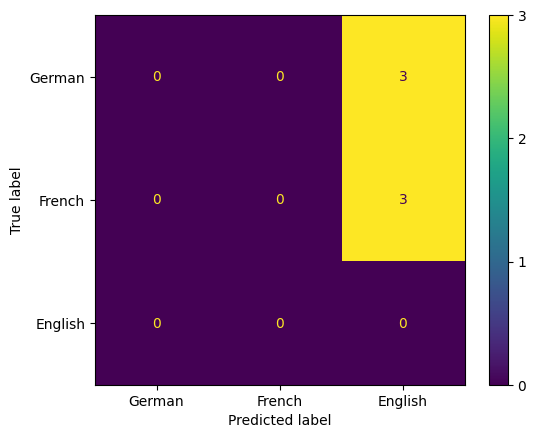

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

print(type(cm))
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['German', 'French', 'English']).plot(cmap='viridis', values_format='d')
cm_disp

colorbar = cm_disp.im_.colorbar
colorbar.set_ticks([0, 1, 2, 3])
plt.show()